#HW #1

Mini Batch Training

In AI, datasets are often very large and cannot be processed all at once as is done in the loop above. The data is instead randomly sampled in smaller batches where each batch contains batch_size inputs. How can you change the loop above to sample the dataset in smaller batches? Hint: Our data variable is a Pandas DataFrame object, search for "how to sample a DataFrame".

Instead of using the entire dataset like

data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
Use

data_batch = data.sample(batch_size)
data_x = data_batch['GrLivArea'].to_numpy()
data_y = data_batch['SalePrice'].to_numpy()
You also have to adjust the loop_N accordingly to make sure that it loop over the entire datasets the same number of times.

loop_N = 30*len(data)//batch_size
Please plot your learning curve for different batch size, such as 32, 64, 128, 256, 512.



**Sol.**

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


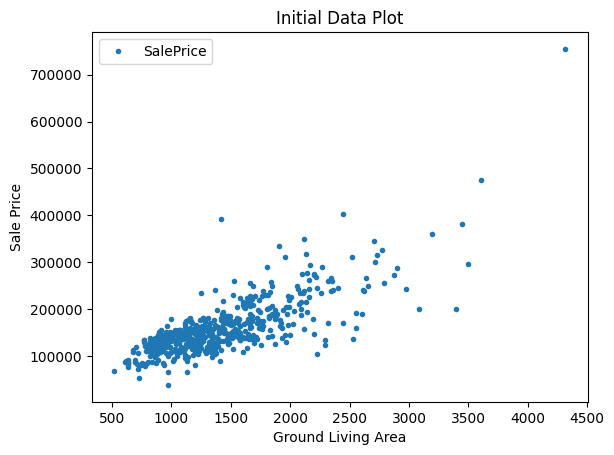

y = 87.69 * x + 34754.08
Initial parameters: y = 5.00 * x + 1000.00
Updated parameters: y = 5.47 * x + 1000.00


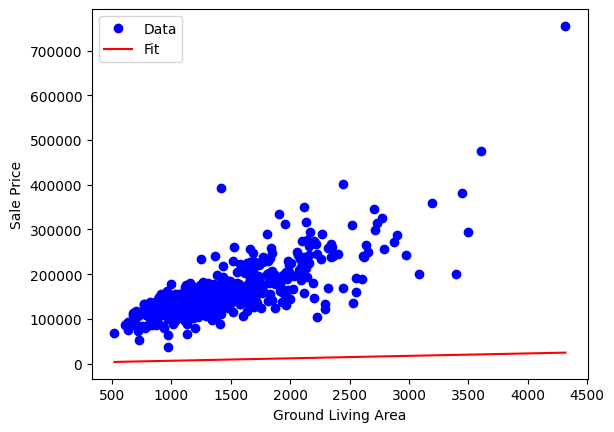

Batch size: 64, m = 91.0606, b = 31298.0447, Loss = 1482575704.9463
Batch size: 128, m = 87.2324, b = 32373.2155, Loss = 1486974843.9266
Batch size: 256, m = 87.5911, b = 32977.2951, Loss = 1481445363.0384
Batch size: 512, m = 89.2501, b = 32766.5438, Loss = 1478496623.7314
Scaled Batch Size: 64, m = 85.5559, b = 35245.3500, Loss = 1485334521.4066
Scaled Batch Size: 128, m = 97.8301, b = 27429.1138, Loss = 1554399091.9982
Scaled Batch Size: 256, m = 94.2023, b = 27980.6959, Loss = 1495188730.6515
Scaled Batch Size: 512, m = 122758.8665, b = -74842963.1466, Loss = 13705765087276924.0000


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time
import os

# Download the dataset if not present
if not os.path.exists('./slimmed_realestate_data.csv'):
    os.system('wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv')

# Load data
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

# Plot initial data
data.plot(x='GrLivArea', y='SalePrice', style='.')
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.title('Initial Data Plot')
plt.show()

# Prepare data for calculations
n = len(data)
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

# Calculate linear fit
sum_xy = np.sum(x * y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x * x)
denominator = n * sum_x2 - sum_x * sum_x
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print(f'y = {m:.2f} * x + {b:.2f}')

# Save initial parameters for comparison
m_calc = m
b_calc = b

# Define helper functions
def plot_data(x, y, m, b, plt=plt):
    plt.plot(x, y, 'bo', label='Data')
    linear_x = np.linspace(x.min(), x.max(), 100)
    linear_y = m * linear_x + b
    plt.plot(linear_x, linear_y, 'r-', label='Fit')
    plt.xlabel('Ground Living Area')
    plt.ylabel('Sale Price')
    plt.legend()
    plt.show()

def model(x, m, b):
    return m * x + b

def loss(x, y, m, b):
    y_predicted = model(x, m, b)
    return np.square(y - y_predicted)

def updated_m(x, y, m, b, learning_rate):
    dL_dm = -2 * np.mean(x * (y - model(x, m, b)))
    return m - learning_rate * dL_dm

def updated_b(x, y, m, b, learning_rate):
    dL_db = -2 * np.mean(y - model(x, m, b))
    return b - learning_rate * dL_db

# Initialize and test update functions
m, b = 5.0, 1000.0
print(f'Initial parameters: y = {m:.2f} * x + {b:.2f}')
learning_rate = 1e-9
m = updated_m(x, y, m, b, learning_rate)
b = updated_b(x, y, m, b, learning_rate)
print(f'Updated parameters: y = {m:.2f} * x + {b:.2f}')
plot_data(x, y, m, b)

# Training loop with loss visualization
def train(batch_size, epochs=30, learning_rate_m=1e-7, learning_rate_b=1e-1):
    loss_history = []
    m, b = 5.0, 1000.0
    for epoch in range(epochs):
        for _ in range(len(data) // batch_size):
            data_batch = data.sample(batch_size)
            data_x = data_batch['GrLivArea'].to_numpy()
            data_y = data_batch['SalePrice'].to_numpy()
            m = updated_m(data_x, data_y, m, b, learning_rate_m)
            b = updated_b(data_x, data_y, m, b, learning_rate_b)
            loss_value = np.mean(loss(data_x, data_y, m, b))
            loss_history.append(loss_value)
    return m, b, np.mean(loss(x, y, m, b))

# Batch size experiments
for batch_size in [64, 128, 256, 512]:
    m, b, final_loss = train(batch_size, epochs=30)
    print(f"Batch size: {batch_size}, m = {m:.4f}, b = {b:.4f}, Loss = {final_loss:.4f}")

# Scaling experiments
for i in [1, 2, 4, 8]:
    batch_size = 64 * i
    lr_m = 1e-7 * i
    lr_b = 1e-1 * i
    m, b, final_loss = train(batch_size, epochs=30, learning_rate_m=lr_m, learning_rate_b=lr_b)
    print(f"Scaled Batch Size: {batch_size}, m = {m:.4f}, b = {b:.4f}, Loss = {final_loss:.4f}")
